# Logistic Regression Assignment

## General Instructions for this assignment:
1. Don't change the function signature
2. Don't change the code already given to you; A lot of the work has been done for you, as we assume you are reasonably familiar with it.
3. Write the code only where asked

## 1. Basic Design of the Model
1. Output of the model: 0 or 1 (Binary Classification)
2. Hypothesis to be tested: $Z = W \cdot X + b$
3. Activation Function: $\frac{1}{1 + e^{-x}} $ (Signmoid Function)

## 2. Import Packages

1. numpy: obviously
2. matplotlib: for making graphs
3. seaborn: Making matplotlib graphs prettier

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Next Libraries are unimportant, they just make everyhting look better

import matplotlib.style as style
import seaborn as sns

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

ModuleNotFoundError: No module named 'seaborn'

## 3. Loading the dataset

We have prepared and preprocessed the data. You can use the `np.load(path)` to obtain a dictionary of numpy arrays.

> The loading has been done for you, just ensure that the path is correct and obtain the nump arrays from the dictionary

In [2]:
#dataset = np.load('quickdraw/10k/dataset.npz')

## Get the numpy arrays from the dictionary
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test  = np.load('X_test.npy')
Y_test  = np.load('Y_test.npy')

In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(784, 8000)
(1, 8000)
(784, 2000)
(1, 2000)


## 4. Get a feel of the data

### 5.1 View the Imagethat
Use the imshow function of matplotlib.pyplot to actually see one of the 28x28 images from the training dataset and its respectie label.

If you loaded the data correctly, then the code below should display
```
(784, 8000)
(1, 8000)
(784, 2000)
(1, 2000)
```

Label: cat


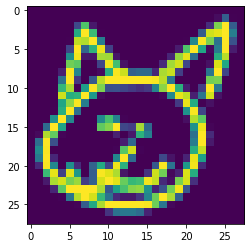

In [4]:
idx = np.random.randint(X_train.shape[1])

plt.imshow(X_train[:, idx].reshape(28, 28))

label = "cat" if Y_train[:, idx][0] else "bat"
print(f"Label: {label}")

### View the raw data

View the actual raw array associated with the idx selected previously

In [5]:
X_train[:, idx]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         8,  77,   1,   0,   0,   0,   0,   0,   0,   0,  56, 185,  17,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  33, 205, 255,  74,   0,   0,   0,   0,   0,   0,   0, 157,
       255, 174,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  74, 237, 245, 255, 108,   0,   0,   0,   0,   0,   0,
         1, 231, 226, 255, 109,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1, 119, 253, 204,  96, 255,  64,   0,   0,   0,   0,
         0,   0,  52, 255,  84, 166, 248,  50,   0,   0,   0,   0,   0,
         0,   0,   0,  19, 185, 255, 149,   6, 108, 255,  19,   0,   0,
         0,   0,   0,   0, 127, 251,  16,  15, 221, 219,  14,   

## 6. Normalizing the data

Normalizing the data with the following equation:

$$ X_{norm} = \frac {X - X_{min}}{X_{max} - X_{min}} $$

For this pixel data, $X_{max} = 255$ and $X_{min} = 0$

> After running the next cell, go back and view the raw array again

In [6]:
## Normalize the training and testning data

# Replace None with relevant code
X_train = X_train/255
X_test = X_test/255

## 7. Helper functions for the Model:

### Write the respective functions described by their docstrings

In [7]:
def sigmoid(z):
    """
    Computes the element sigmoid of scalar or numpy array(element wise)
    
    Arguments:
        z: Scalar or numpy array
    
    Returns:
        s: Sigmoid of z (element wise in case of Numpy Array)
    """
    ### Write Code here ###
    s = 1/(1 + np.exp(-z))
    
    ### End Code here ###
    
    return s
#sigmoid(0)

In [8]:
def initialize_parameters(n_x):
    """
    Initialize w to a zero vector, and b to a 0 with datatype float 
    
    Arguments:
        n_x: Number of features in each sample of X
    
    Returns:
        w: Initialized Numpy array of shape (1, n_x) (Weight)
        b: Initialized Scalar (bias)
    """
    
    w = np.zeros([1,n_x])
    b = float(0)
    
    return w , b
#initialize_parameters(15)

In [9]:
def compute_cost(A, Y):
    """
    Calculate the Cost using the Cross Entropy Loss
    
    Arguments:
        A: Computer Probabilities, numpy array
        Y: Known Labels, numpy array
        
    Returns:
        cost: The computed Cost
    """
    m = Y.shape[1]
    epsilon = 1e-5
    J = (-(Y).dot((np.log(A + epsilon)).T) - ((1 - Y).dot((np.log(1-A + epsilon)).T)))*(1/m)
    
    return np.squeeze(J)


Here is a summary of the equations for Forward Propagation and Backward Propagation we have used so far:

For m training examples $ X_{train} $ and $ Y_{train} $:

### 7.1 Forward Propagation

$$ Z^{(i)} = w \cdot X_{train}^{(i)} + b $$

$$ \hat Y^{(i)} = A^{(i)} = \sigma(Z^{(i)}) = sigmoid(Z^{(i)}) $$

$$ \mathcal{L}(\hat Y^{(i)}, Y_{train}^{(i)}) = \mathcal{L}(A^{(i)}, Y_{train}^{(i)}) = -[Y_{train}^{(i)} \log(A^{(i)}) + (1 - Y_{train}^{(i)}) \log(1 - A^{(i)})] $$

$$ J = \frac{1}{m} \sum_1^m \mathcal{L} (A^{(i)}, Y_{train}^{(i)}) $$


### 7.2 Backward Propagation - Batch Gradient Descent

$$ \frac{\partial J}{\partial w} = \frac{1}{m} (A - Y) \cdot X^T $$

$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_1^m (A - Y) $$


> Note: Represent $ \frac{\partial J}{\partial w} $ as dw, and $ \frac{\partial J}{\partial b}$ as db


In [10]:
def propagate(w, b, X, Y):
    """
    Perform forward and backward propagation for the Logistic Regression model
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with shape (n_x, m)
        Y: Label Matrix of shape (1, m)
        
    Returns:
        dw: Gradient of the weight matrix
        db: Gradient of the bias
        cost: Cost computed on Calculated Probability, and output Label
    """

    #Performing forward propagation
    z = (w.dot(X)) + b
    A = sigmoid(z)
    cost = compute_cost(A , Y)

    # Performing back-propagation
    dw = ((A - Y) @ X.T)/(Y.shape[1])
    db = np.mean(Y - A)
    
    
    assert dw.shape == w.shape
    return dw, db, cost
    

### 7.3 Optimization

For a parameter $ \theta $, the gradient descent update rule is given by:
$$ \theta := \theta - \alpha \frac{\partial J}{\partial \theta} $$

where $\alpha$ is the learning rate

In [11]:
def fit(w, b, X, Y, num_iterations, learning_rate, print_freq=100):
    """
    Given the parameters of the model, fit the model corresponding to the given Input Matrix aand output labels, by performing batch gradient descent for given number of iterations.
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with shape (n_x, m)
        Y: Label Matrix of shape (1, m)
        num_iterations: The number of iteratios of bgd to be performed
        print_freq: Frequency of recording the cost
    Returns:
        w: Optimized weight matrix
        b: optimized bias
        costs: print the cost at frequency given by print_freq, no prints if freq is 0
    """
    
    costs = []
    for i in range(num_iterations):
        ## 1. Calculate Gradients and cost
        dw , db , cost = propagate(w , b , X , Y)

        costs.append(cost)
            
        if print_freq and i % print_freq == 0:
            print(f"Cost after iteration {i}: {cost}")
                
        ## 2. Update parameters
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)    

            
    return w, b, costs
        

### 7.4 Prediction
Use the following equation to determine the class that a given sample belongs to:

$$
\begin{equation}
    Y_{prediction}^{(i)} =
    \begin{cases} 
        1 \text{, if } \hat Y^{(i)} \ge 0.5\\
        0 \text{, if } \hat Y^{(i)} \lt 0.5\\
    \end{cases}
\end{equation}
$$

> Hint: Use boolean Masking

In [12]:
def predict(w, b, X):
    """
    Predict the class which the given feature vector belongs to given Weights and Bias of the model
    
    Arguments:
        w: The Weight Matrix of dimension (1, n_x)
        b: Bias
        X: Input Matrix, with X.shape[0] = n_X
    Returns:
        Y_prediction: Predicted labels
    """
    Y_prediction = np.where(sigmoid((w.dot(X)) + b) >= 0.5 , 1 , 0)
    return Y_prediction

## 8. Building the Model

Now we have assembled all the individual pieces required to create the Logistic Regression model.
Next function is creating the model and calculating its train and test accuracy. 

Acuracy is the ratio of correctly guessed samples, to the total number of samples that were checked. 
> Note: The correct accuracy is not being provided this time.

In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_freq):
    """
    Create a model and fit it to the train and test data. Use this model to compute the train and test accuracy after 2500 iterations
    
    Arguments:
        X_train: Training Data X
        Y_train: Training Data Y
        X_test: Testing Data X
        Y_test: Testing data Y
        num_iterations: Number of iterations of bgd to perform
        learning_rate: Learning Rate of the model
        print_freq: Frequency of recording the cost
    Returns:
        -None-
    """
    # fitting data to classifier
    w , b = initialize_parameters(784)
    w , b , costs = fit(w , b , X_train , Y_train , num_iterations , learning_rate , print_freq)
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    
    costs = np.squeeze(costs)
    
    print(f"train accuracy: {100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100} %")
    print(f"test accuracy: {100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100} %")
    
    plt.plot(costs)
    
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()
    return

Cost after iteration 0: 0.6931271807599264
Cost after iteration 100: 0.47357795511972695
Cost after iteration 200: 0.4228570839393334
Cost after iteration 300: 0.39737834610244155
Cost after iteration 400: 0.3814410588737608
Cost after iteration 500: 0.3705436299379937
Cost after iteration 600: 0.3626881925090981
Cost after iteration 700: 0.35680455731991456
Cost after iteration 800: 0.352262570233598
Cost after iteration 900: 0.3486681938416862
Cost after iteration 1000: 0.34576374049723085
Cost after iteration 1100: 0.3433744931938563
Cost after iteration 1200: 0.3413783660322621
Cost after iteration 1300: 0.33968783665755103
Cost after iteration 1400: 0.3382387631265408
Cost after iteration 1500: 0.3369832293360869
Cost after iteration 1600: 0.33588483428548865
Cost after iteration 1700: 0.3349155111453482
Cost after iteration 1800: 0.3340533308745087
Cost after iteration 1900: 0.3332809552645251
Cost after iteration 2000: 0.332584527887649
Cost after iteration 2100: 0.3319528662101

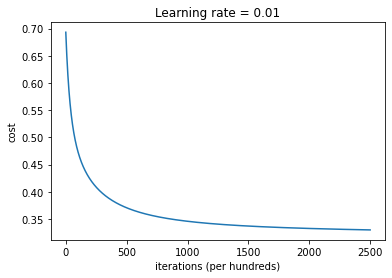

In [14]:
model(X_train, Y_train, X_test, Y_test, num_iterations=2500, learning_rate=0.01, print_freq=100)

## 9. Experiments (Not Graded)

Try using different Learning Rates, Change the number of iterations, try a different initialization of the parameters, try Stochastic Gradient Descent on the same Model. The possibilities are endless, and we encourage you to explore as much as you can. You can even try to use the Logistic Regression Model implementation from the ScikitLearn library, or explore other optimizing algorithms! If you try something new, do send it along with the assignment. We'd love to see what kinda work you are doing! Till then, adios!

In [19]:
w , b = initialize_parameters(784)
w , b , costs = fit(w , b , X_train , Y_train , 2500 , 0.1 , 2500)
predict( w,b, X_test[: ,1])

Cost after iteration 0: 0.6931271807599264


array([1])